# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
    For this project we used TMDb movie dataset taken from kaggle website. the dataset contains many features recorded for each movie such as cast, budget, director,etc. We will look into the dataset and see what needs to be cleaned before we begin analysing it. As for the questions in mind, we would like to address the following:
        1- What are the most popular genres? Which one profits more per movie?
        2- Which Actors had the most participation? also which actors participated the most with the same director?
        3- How does the revenue correlates with the budget?
    Hopefully by the end of this project we can produce good findings from the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### 10,866 movies with 21 features

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

###### It seems we have a good chunk of missing values

In [5]:
df.duplicated().sum()

1

###### Suprisingly, we only have 1 duplicate row.

#### Now off to the cleaning process

### Data Cleaning Process

##### Dropping columns which are not needed in my analysis

In [6]:
col = ['popularity','id','imdb_id','budget','revenue',
       'original_title','homepage','runtime','overview',
       'tagline','keywords','production_companies',
       'release_date','vote_count','vote_average']

In [7]:
df.drop(col,axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cast          10790 non-null  object 
 1   director      10822 non-null  object 
 2   genres        10843 non-null  object 
 3   release_year  10866 non-null  int64  
 4   budget_adj    10866 non-null  float64
 5   revenue_adj   10866 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 509.5+ KB


It seems we have some missing values, we will look into that momentarily.

In [9]:
df.describe()

,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04
mean,2001.322658,1.755104e+07,5.136436e+07
std,12.812941,3.430616e+07,1.446325e+08
min,1960.000000,0.000000e+00,0.000000e+00
25%,1995.000000,0.000000e+00,0.000000e+00
50%,2006.000000,0.000000e+00,0.000000e+00
75%,2011.000000,2.085325e+07,3.369710e+07
max,2015.000000,4.250000e+08,2.827124e+09


Looks like budget_adj and revenue_adj have alot of zeros.

In [10]:
df[df['budget_adj'] == 0].shape[0]

5696

In [11]:
df[df['revenue_adj'] == 0].shape[0]

6016

More than half of the rows have zeros in their revenue_adj and budget_adj columns, we will drop it with the rest of missing values from other columns.

In [12]:
df['budget_adj'].replace(0,np.NAN,inplace=True)

In [13]:
df['revenue_adj'].replace(0,np.NAN,inplace=True)

In [14]:
df.isnull().sum()

cast              76
director          44
genres            23
release_year       0
budget_adj      5696
revenue_adj     6016
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cast          3849 non-null   object 
 1   director      3849 non-null   object 
 2   genres        3849 non-null   object 
 3   release_year  3849 non-null   int64  
 4   budget_adj    3849 non-null   float64
 5   revenue_adj   3849 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 210.5+ KB


Now our dataset is clean.

In [19]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

We calculated the profit based on revenue and budget

In [20]:
df.head()

,cast,director,genres,release_year,budget_adj,revenue_adj,profit
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: 
    What are the most popular genres? Which one profits more per movie?

With the help of this function that i acquired from:

https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows1

If we have more than 1 value in a column per row, we can use this method to split the values and so we have 1 value for 1 row each.

How it works: It takes a DataFrame and a list of columns to apply it on. You can fill null values with and as well as preserve your indices.

In [21]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [22]:
sf = df.copy()

Making a copy as to not to mess with our original dataset

In [23]:
sf['genres'] = sf['genres'].apply(lambda x: x.split('|'))

since some movies have mulitple genres we will split them and turn them into a list to process it for the explode function

In [24]:
new = explode(sf,['genres'])

In [25]:
new.head()

,budget_adj,cast,director,profit,release_year,revenue_adj,genres
0,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1.254446e+09,2015,1.392446e+09,Action
1,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1.254446e+09,2015,1.392446e+09,Adventure
2,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1.254446e+09,2015,1.392446e+09,Science Fiction
3,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1.254446e+09,2015,1.392446e+09,Thriller
4,1.379999e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,2.101614e+08,2015,3.481613e+08,Action


Now we can check for the number of each genre

In [26]:
vc = new['genres'].value_counts()
vc

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
Name: genres, dtype: int64

In [27]:
new['genres'].nunique()

20

We have 20 genres

from this we can plot and see how each genre compares with the other 

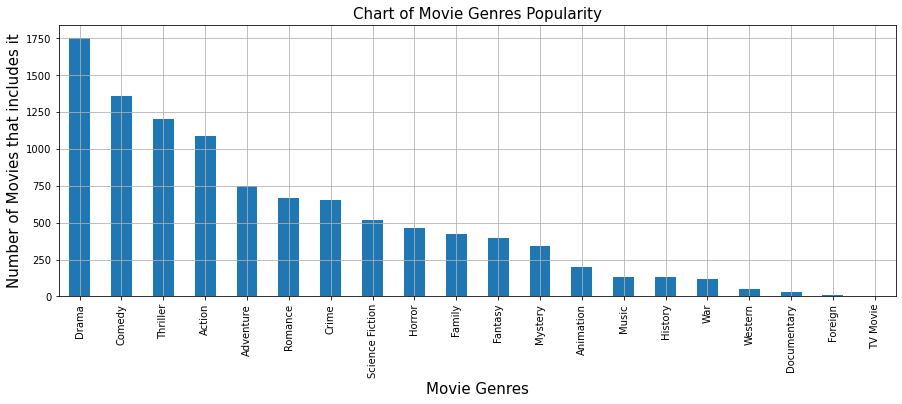

In [28]:
vc.plot(kind='bar',figsize=(15,5));
plt.title('Chart of Movie Genres Popularity', fontsize= 15);
plt.xlabel('Movie Genres', fontsize= 15);
plt.ylabel('Number of Movies that includes it', fontsize= 15);
plt.grid()

###### It look like the drama genre is more often appears in movies than other genres.

#### Now let's look at which genre generate more profit

In [29]:
pm = new.groupby('genres')['profit'].mean().sort_values(ascending=False)

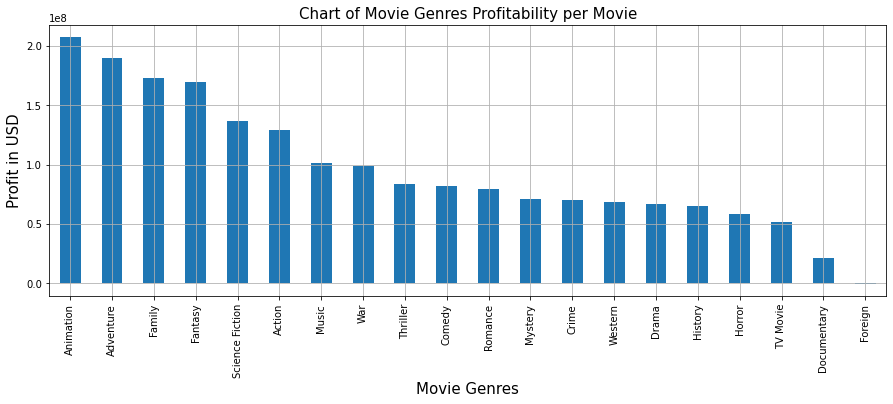

In [30]:
pm.plot(kind='bar',figsize=(15,5));
plt.title('Chart of Movie Genres Profitability per Movie', fontsize= 15);
plt.xlabel('Movie Genres', fontsize= 15);
plt.ylabel('Profit in USD', fontsize= 15);
plt.grid()

###### This shows us that the animation genre generally generates more profit per movie.

### Research Question 2:
    Which Actors had the most participation? also which actors participated the most with the same director?

In [31]:
sf2 = df.copy()

Making a copy as to not to mess with our original dataset

In [32]:
sf2['cast'] = sf2['cast'].apply(lambda x: x.split('|'))

Doing the same thing we did on the genre column

In [33]:
sf2c = explode(sf2, 'cast')

In [34]:
sf2c['cast'].describe()

count              19191
unique              6835
top       Robert De Niro
freq                  52
Name: cast, dtype: object

On total, we have 6,835 actors. Let's check for the top 50 actor participation

In [35]:
vc2 = sf2c['cast'].value_counts()[:50]
vc2

Robert De Niro           52
Bruce Willis             46
Samuel L. Jackson        44
Nicolas Cage             43
Matt Damon               36
Johnny Depp              35
Sylvester Stallone       34
Harrison Ford            34
Tom Hanks                34
Morgan Freeman           34
Brad Pitt                34
Tom Cruise               33
Eddie Murphy             32
Denzel Washington        32
Liam Neeson              31
Owen Wilson              30
Julianne Moore           30
Arnold Schwarzenegger    29
Gene Hackman             29
Willem Dafoe             29
Mark Wahlberg            29
Robin Williams           29
Meryl Streep             29
Cameron Diaz             28
Dennis Quaid             28
Keanu Reeves             28
Ben Affleck              28
Jim Carrey               28
Ewan McGregor            28
Antonio Banderas         27
Adam Sandler             27
Nicole Kidman            27
Colin Farrell            27
James Franco             26
John Goodman             26
Ben Stiller         

Now we plot the result

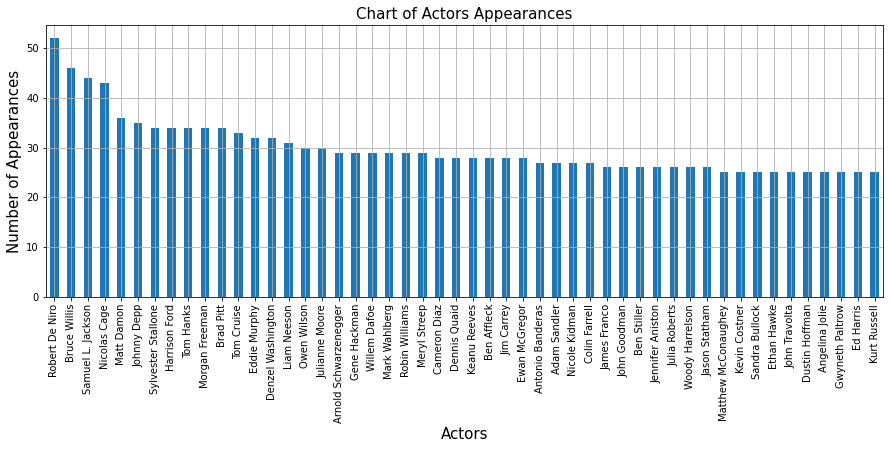

In [36]:
vc2.plot(kind='bar',figsize=(15,5));
plt.title('Chart of Actors Appearances', fontsize= 15);
plt.xlabel('Actors', fontsize= 15);
plt.ylabel('Number of Appearances', fontsize= 15);
plt.grid()

###### It looks like the actor Robert De Niro had the most appearances in movies. let's see when was his first appearance as well as his last apperance.

In [37]:
sf2c[sf2c['cast'] == 'Robert De Niro']['release_year'].sort_values(ascending=False).iloc[[0,-1]]

240      2015
18937    1973
Name: release_year, dtype: int64

He has been in the industry from 1973 and still going for more than 40 years.

### Now let's check which actors participated the most with the same director?

In [38]:
dc = sf2c.groupby(['director','cast'])['cast'].count().sort_values(ascending=False)[0:50]

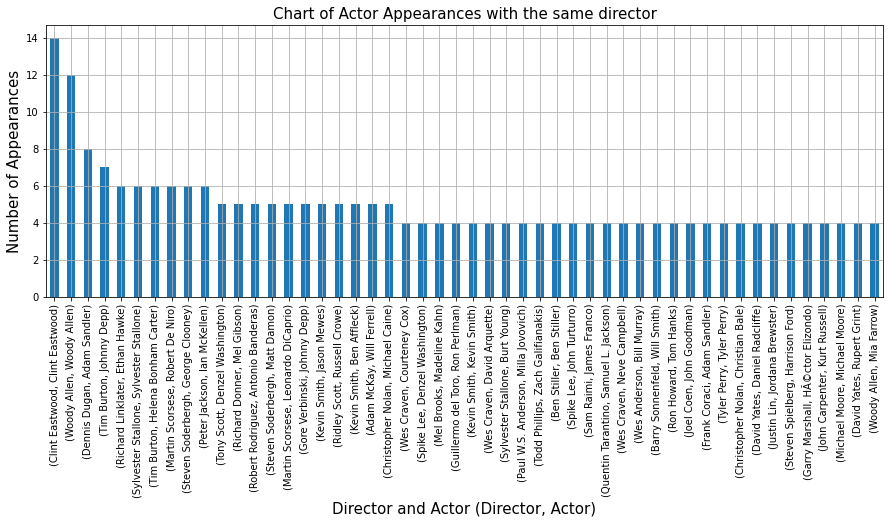

In [39]:
dc.plot(kind='bar',figsize=(15,5));
plt.title('Chart of Actor Appearances with the same director', fontsize= 15);
plt.xlabel('Director and Actor (Director, Actor)', fontsize= 15);
plt.ylabel('Number of Appearances', fontsize= 15);
plt.grid()

###### It seems that Clint Eastwood loves to direct and act in his movies.

### Research Question 3:
    How does the revenue correlates with the budget?

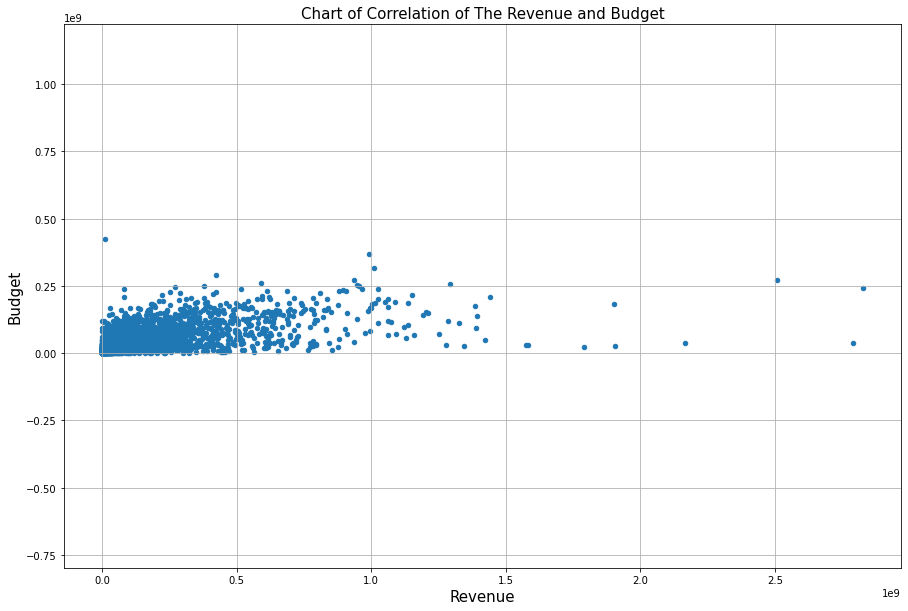

In [40]:
df.plot(x='revenue_adj',y='budget_adj',kind='scatter',figsize=(15,10));
plt.title('Chart of Correlation of The Revenue and Budget', fontsize= 15);
plt.xlabel('Revenue', fontsize= 15);
plt.ylabel('Budget', fontsize= 15);
plt.axis('equal');
plt.grid();

In [41]:
df[['revenue_adj','budget_adj']].corr()

,revenue_adj,budget_adj
revenue_adj,1.000000,0.570187
budget_adj,0.570187,1.000000


From the table above we can determine that the correlation between the revenue and budget is 0.567983. As for the graph, we can see that most movies are profitable with almost double the amount of budget that they had. There are some movies with a negative profit margin. Some movies had revenue more than double the budget, whereas a handful of movies made huge revenues that amounts to many multiples of the budget.

<a id='conclusions'></a>
## Conclusions
    After cleaning and analysing the dataset we managed to find that the drama genre is the most popular while the animation genre is more profitable per movie. We also found that Robert De Niro is the most active actor with 52 appearances with a range of 43 years from 1973 up to 2015. also, Clint Eastwood always act in his own movies. finally, for budget and revenue we found that their correlation is 0.567983 which provieded insight on the many movies being profitable with some movies making huge profits.
    As for the limitation that we had from the dataset, it had many missing values as well zeros for some numerical columns which affected the accuracy of the analysis. Otherwise, it was a decent dataset on a whole.